# Linear Regression      
#### Personal Notes

In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from statsmodels.stats.diagnostic import het_breuschpagan

## I - Principle of the model

### I.1 Hypothesis of the model

Determining $f$ is in reality hard as we only have access to a finite number of data points $\mathcal{T}_{training} = (x_i,y_i)_{1 \leq N}$. Indeed, this lead to issue as by example if we used the RSS (**R**esidual **S**um of **S**quares) as a criterion to determine if a function is good enough, i.e : 
$$
RSS \left( f \right) = \sum_{i=1}^{N} \left( y_i - f \left( x_i \right) \right)^2 
$$
What we clearly understand is that each function going exactly through the points at $y_i$ would be a perfect fit. Therefore, to solve our problem we are going to make the following assumptions : 
- The relationship between X and Y is defined as the following : 
$$
Y = f \left( X \right) + \varepsilon \quad \varepsilon \sim \mathcal{N} \left( 0, \sigma^2 \right) \quad \text{and} \quad \varepsilon \perp\!\!\!\!\perp X
$$  
This assumption means that the conditionnal distribution $\mathbb{P}_{R} \left( X,Y \right)$ depends on $X$ only through $f \left( x \right)$ 
- The underlying structure of the data is the following : 
$$
f(X) = \beta_0 + \sum_{j=1}^{p} \beta_j X_j
$$
Where the coefficients $\left( \beta \right)_{1 \leq i \leq p}$ are found by solving the following optimization problem : 
$$ 
\begin{align*}
\beta^{\star} &= argmin_{\beta \in \mathbb{R}^{p+1}} RSS \left( \beta \right) \\
    &= argmin_{\beta \in \mathbb{R}^{p+1}} \left( \sum_{i=1}^{N} \left( y_i - f \left( x_i \right) \right)^2  \right)\\
    &= argmin_{\beta \in \mathbb{R}^{p+1}} \left( \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_p \right)^2 \right)
\end{align*}
$$
What we can remark is that by defining the structure of our model, we went from a class of function to a class of parameters. Therefore, now identifying the good function $f$ is the same as identifying the coefficients $\beta_i$. Therefore, in the following we will use $f$ and $\beta$ indistinctively.

### I.2 - Information on the beta

In this setting the best coefficients $\beta$ can be found analytically : 
$$
\begin{equation*}
    \beta^{\star} = \left( \mathbf{X}^{T} \mathbf{X} \right)^{-1} \mathbf{X}^{T} \mathbf{Y}
\end{equation*}
$$

Indeed : 
$$
\begin{align*}
    RSS \left( \beta \right) &= \left( y - \mathbf{X} \beta \right)^T \left(y - \mathbf{X} \beta \right)
\end{align*}
$$
Thus if we take the derivative with respect to $\beta$ : 

Furthermore, the values of the $\beta_j$ coefficients is the following : 
$$
\begin{align*}
    \beta_0 &= \bar{\mathbf{Y}} - \sum_{j=1}^p \beta_j \bar{\mathbf{x}_j} \\
    \beta_j &= \frac{Cov\left( \mathbf{x_j},\mathbf{Y} \right) }{V \left( \mathbf{x_j} \right)}
\end{align*}
$$

# I.3 - What if the hypothesis are not respected 

So far we listed the following hypothesis for a linear regression : 
- **Heteroscedasticity** : The variance of the errors is the same for each feature      
- **non-linearity** : The relationship between the features and the target is linear        
- **no-autocorrelation** : the errors are independent       
- **multicollinearity** : There is no perfect multicolinearity between the features

### I.3.1 - Heteroscedasticity

Suppose that instead of having the same variance, each         
\begin{equation*}
    \epsilon \sim \mathcal{N} \left(0, A \right)
\end{equation*}
Where A is a diagonal matrix such that : $diag(A) = [\sigma_1, ... , \sigma_n]$

In [92]:
n_features = 6
nb_points = 1000

true_beta = np.random.normal(loc = 0, scale = 2, size = n_features).reshape(n_features,1)
X = np.random.normal(loc = 0, scale = 1, size = (nb_points, n_features))

scales = 0.1 + 0.5 * np.abs(np.dot(X, true_beta)) 
errors = np.random.normal(loc=0, scale=scales)

Y = np.dot(X, true_beta) + errors

In [93]:
beta_ols = np.dot(np.linalg.inv(np.dot(X.T,X)) ,np.dot(X.T,Y)) 

y_pred = np.dot(X, beta_ols)
error_computed = Y - y_pred

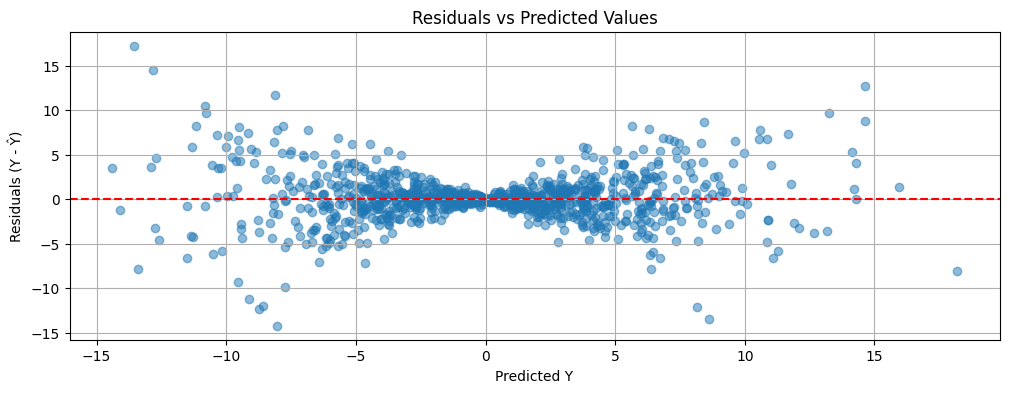

In [96]:
fig = plt.figure(figsize=(12,4))
plt.scatter(y_pred, error_computed, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')

plt.grid()
plt.xlabel("Predicted Y")
plt.ylabel("Residuals (Y - Ŷ)")
plt.title("Residuals vs Predicted Values")
plt.show()

Here we can see that the residuals don't have the same variance ....      
We can seek deeper in case the plot is not enough relevant by using the Breusch–Pagan test 

In [98]:
X_with_intercept = sm.add_constant(X)
model = sm.OLS(Y, X_with_intercept).fit()
bp_test = het_breuschpagan(model.resid, X_with_intercept)

In [99]:
labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val:.4f}")

Lagrange Multiplier Statistic: 24.0812
p-value: 0.0005
f-value: 4.0838
f p-value: 0.0005


The p-value is below 5% therefore the heteroskedicidtiy is signifiant

How to overcome it ? Weighted least squares 

### I.3.2 - Non-linearity

Suppose that in fact the relationship between the dependent variables and the target is non linear

### I.3.3 - autocorrelation

### I.3.4 - Multicollinearity

## II - Penalization methods 

### II.1 - The need for penalization 

Earlier we saw that under the hypothesis that the relationship between the predictors and the target variable is linear, then we can find the best estimator for the parameters $\beta$       
However this is under some "well-possed" conditions. We are going to see that in certain circonstances, we can have some issues  

### II.1.1 - Overfitting on the train set 

In [23]:
total_data_points = 100
n_data_available = 10
x = np.linspace(0, 3, total_data_points)
true_y = x*(x-1)*(x-2)*(x-3) ## f : x -> x^4-6x^3+11x^2-6x 

idx = np.random.randint(0,100,size=n_data_available)
eps = np.random.normal(0, 0.5, size=total_data_points)

available_X = x[idx]
available_Y = true_y[idx] + eps[idx]
noisy_y = true_y + eps

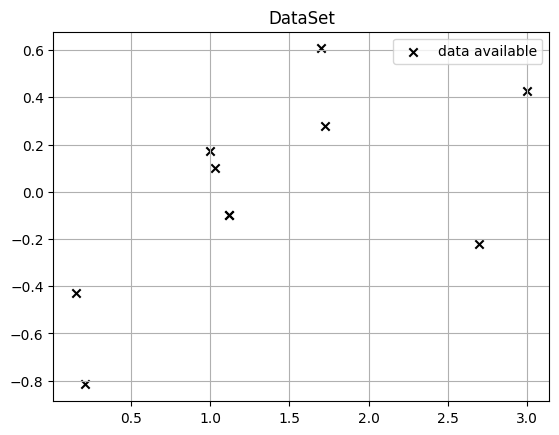

In [24]:
plt.scatter(available_X,available_Y, label = 'data available', marker = 'x', color = 'black')
#plt.plot(x,true_y, label = 'true data')
plt.title("DataSet")
plt.legend()
plt.grid()
plt.show()

Suppose that we know that the underlying data has been generated from a polynomial function. Thus there exist a Polynom $P \in \mathbb{R}[X]$ such that : 
$$
\begin{align*}   
    \mathbb{E} \left[ Y \middle| X \right] &= f(X) \\
        &= \sum_{i=0}^{N} \beta_i \phi_i \left(X \right) \\
        &= \sum_{i=0}^{N} \beta_i X^i  
\end{align*}
$$ 
In this situation, the unknowns variables are : 
- $N$ the degree of the polynomial 
- The set of parameters $\beta$, the coefficients of the polynomial, that minimize the cost function      

We are going to start with $N=3$

In [25]:
f1 = lambda x : x
f2 = lambda x : x**2
f3 = lambda x : x**3
f = lambda x,beta1,beta2,beta3 : beta1*f1(x) + beta2*f2(x) + beta3*f3(x)
true_f = lambda x : f4(x) -6*f3(x) + 11*f2(x) -6*f1(x)

In [26]:
X = np.round(np.array([[v, v**2, v**3] for v in available_X]),4)

In [27]:
X

array([[1.03030e+00, 1.06150e+00, 1.09370e+00],
       [2.12100e-01, 4.50000e-02, 9.50000e-03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.12120e+00, 1.25710e+00, 1.40950e+00],
       [1.69700e+00, 2.87970e+00, 4.88680e+00],
       [2.69700e+00, 7.27360e+00, 1.96168e+01],
       [3.00000e+00, 9.00000e+00, 2.70000e+01],
       [1.51500e-01, 2.30000e-02, 3.50000e-03],
       [1.72730e+00, 2.98350e+00, 5.15330e+00],
       [1.12120e+00, 1.25710e+00, 1.40950e+00]])

In [28]:
beta = np.dot(np.linalg.inv(np.dot(X.T,X)) ,np.dot(X.T,np.reshape(available_Y,(n_data_available,1))))

In [29]:
print(beta)

[[-0.84039544]
 [ 1.01023165]
 [-0.24102015]]


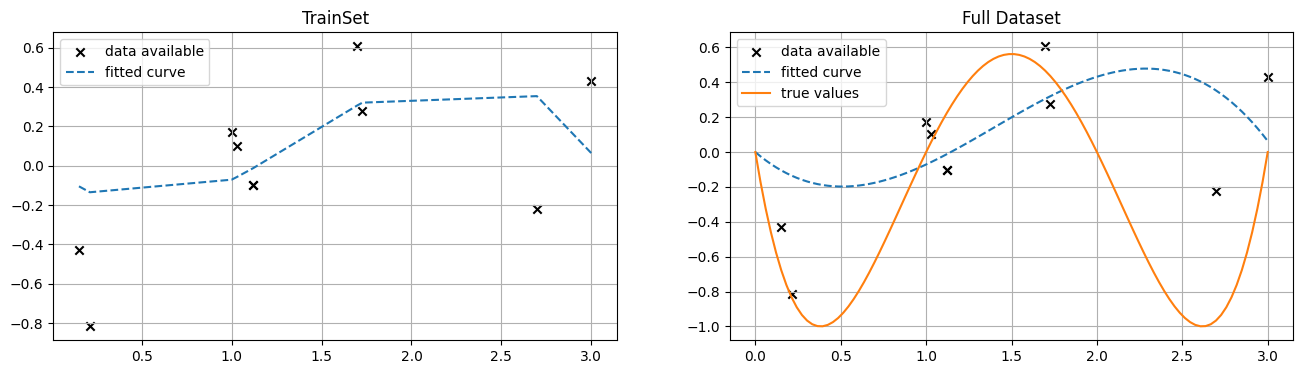

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols= 2,figsize = (16,4))
ax[0].scatter(available_X,available_Y, label = 'data available', marker = 'x', color = 'black')
ax[0].plot(np.sort(available_X),f(np.sort(available_X),beta[0],beta[1], beta[2]), label = 'fitted curve', linestyle='dashed')
ax[0].set_title("TrainSet")
ax[0].legend()
ax[0].grid()

ax[1].scatter(available_X,available_Y, label = 'data available', marker = 'x', color = 'black')
ax[1].plot(x,f(x,beta[0],beta[1], beta[2]), label = 'fitted curve', linestyle='dashed')
ax[1].plot(x,true_y, label = 'true values')
ax[1].set_title("Full Dataset")
ax[1].legend()
ax[1].grid()

plt.show()

In [9]:
print("Train Set RSS :" ,np.sum((f(available_X,beta[0],beta[1], beta[2])-available_Y)**2 )/n_data_available )
print("Test Set RSS :" ,np.sum((f(x[~idx],beta[0],beta[1], beta[2])-noisy_y[~idx])**2 )/(total_data_points - n_data_available) )

Train Set RSS : 0.24831353945568377
Test Set RSS : 1.8739582229348635


We can see that the RSS is 'low' but we wish to have an even lower one. We can try to take a polynomial with a higher degree as it should be a better fit

In [10]:
X = np.round(np.array([[v, v**2, v**3, v**4, v**5, v**6, v**7, v**8, v**9] for v in available_X]),4)
beta = np.dot(np.linalg.inv(np.dot(X.T,X)) ,np.dot(X.T,np.reshape(available_Y,(n_data_available,1))))

In [11]:
print(beta)

[[  -25.36324374]
 [  253.28039959]
 [-1218.4047182 ]
 [ 2978.64917451]
 [-3989.62824882]
 [ 3060.2215612 ]
 [-1340.23995367]
 [  311.57852593]
 [  -29.82564351]]


In [12]:
f1 = lambda x : x
f2 = lambda x : x**2
f3 = lambda x : x**3
f4 = lambda x : x**4
f5 = lambda x : x**5
f6 = lambda x : x**6
f7 = lambda x : x**7
f8 = lambda x : x**8
f9 = lambda x : x**9
f = lambda x,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9 : beta1*f1(x) + beta2*f2(x) + beta3*f3(x) + beta4*f4(x) + beta5*f5(x) + beta6*f6(x) + beta7*f7(x) + beta8*f8(x) + beta9*f9(x)

In [13]:
print(
    "Train Set RSS : ",
    np.sum( (f(available_X,beta[0],beta[1], beta[2],beta[3],beta[4],beta[5],beta[6],beta[7],beta[8]) - available_Y )**2 / n_data_available )
      )
print(
    "Test Set RSS : ",
    np.sum( (f(x[~idx],beta[0],beta[1], beta[2],beta[3],beta[4],beta[5],beta[6],beta[7],beta[8]) - noisy_y[~idx] )**2 / (total_data_points - n_data_available) )
      )

Train Set RSS :  0.1418419777602815
Test Set RSS :  37590.774990149774


Here we lowered the RSS on the Train Set but the RSS on the test set is higher

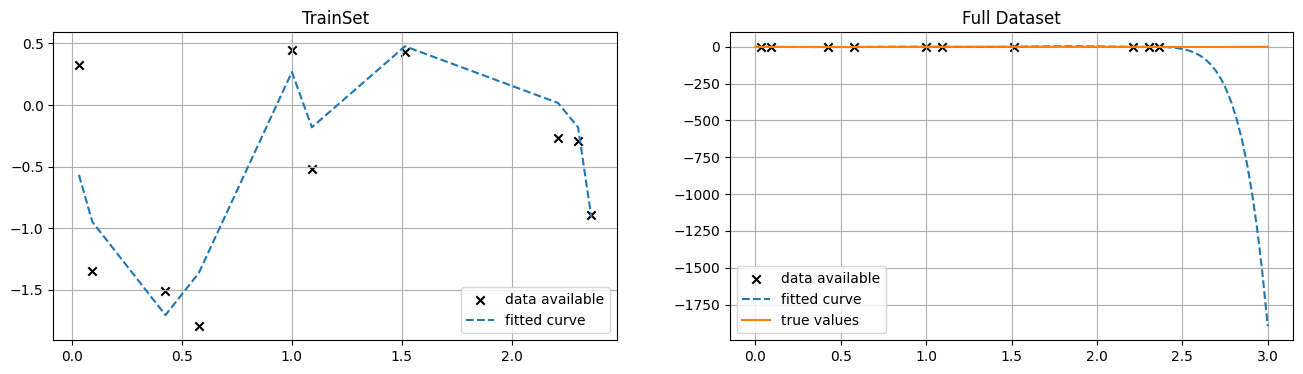

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols= 2,figsize = (16,4))
ax[0].scatter(available_X,available_Y, label = 'data available', marker = 'x', color = 'black')
ax[0].plot(np.sort(available_X),f(np.sort(available_X),beta[0],beta[1], beta[2],beta[3],beta[4],beta[5],beta[6],beta[7],beta[8]), label = 'fitted curve', linestyle='dashed')
ax[0].set_title("TrainSet")
ax[0].legend()
ax[0].grid()

ax[1].scatter(available_X,available_Y, label = 'data available', marker = 'x', color = 'black')
ax[1].plot(x,f(x,beta[0],beta[1], beta[2],beta[3],beta[4],beta[5],beta[6],beta[7],beta[8]), label = 'fitted curve', linestyle='dashed')
ax[1].plot(x,true_y, label = 'true values')
ax[1].set_title("Full Dataset")
ax[1].legend()
ax[1].grid()

plt.show()

What happened is that by taking a polynomial with a too high degree, we overfitted our model to the train set thus we reduced it's capacity to generalise 

### II.1.2 - Ill-conditioned problem 

So far we have seen that in some ca   
Let's suppose now that we have a 

In [15]:
X1 = np.random.normal(scale = 1, size = 200)
Z = np.random.normal(scale = 1, size = 200)

rho_arr = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999, 0.9999,0.99999, 0.9999999]
cond_arr = []
for rho in rho_arr:
    X2 = rho*X1 + (1-rho)*np.random.normal(scale = 1, size = 200)
    df = pd.DataFrame({"X1": X1, "X2": X2})
    X = df.values
    cond_arr.append(np.linalg.cond(np.dot(X.T,X)))

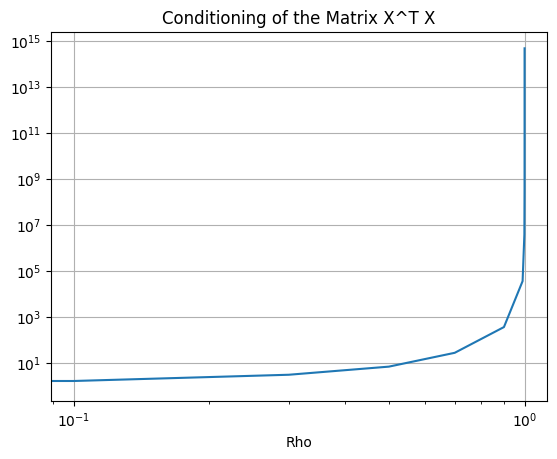

In [16]:
plt.plot(rho_arr, cond_arr)
plt.xscale("log"); plt.yscale("log")
plt.title("Conditioning of the Matrix X^T X")
plt.xlabel("Rho")
plt.grid()
plt.show()

### II.2 - The idea behind penalization

Earlier we used the RSS criterion to determine if a function f fitted or not. However, the issue is that we would have a good fit on the training set but poor results on the test set. Therefore, we understand that our criterion is not the most adapted, we need to somehow modify it. One of the way is to add a penalty term, i.e : we don't use **RSS** but **PRSS** (**P**enalised **R**esidual **S**um of **S**quares) : 
$$
PRSS \left( f , \lambda \right) = RSS \left( f \right) + \lambda J \left( f \right) 
$$ 
Where J denotes the penalization.         
In fact this formulation is the Lagrangian one. A penalization means that we put some constraints. In our case our objective function is the RSS, and we selected a $t \in \mathbb{R}^{+}$ such that our constrained problem is : 
$$
\begin{align*}
    &\inf_{\beta \in \mathbb{R}^p} \left( \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_p \right)^2 \right) \\
    &\text{s.t : } J \left( \beta \right) \leq t 
\end{align*}
$$

However note that by constraining our problem, we are in fact trading some bias we introduce to decrease the variance 

### Lasso Regression 

The **LASSO** ( **L**east **A**bsolute **S**hrinkage and **S**election **O**perator ) Regression is a regularization method where the function $J$ is the $L_1$ norm. In our case we apply it to the linear regression thus on the coefficients $ \left( \beta_i \right)_{1 \leq i \leq p}$ which gives : 
$$
PRSS \left( \beta, \lambda \right) = RSS \left( \beta \right) + \lambda || \beta ||_{1}
$$

### The feature selection of LASSO

Let's suppose that we have a target variable $Y$, and we have $p$ features and $N$ points.           
Some of our issues are to determine if : 
- All of those features are necessary or not
- Do we have enough points to not overfit or underfit         
To showcase this, let's suppose that in fact the underlying model is a sparse one (i.e : we only need a few of our features) but we don't know it yet when modelling it 

In [17]:
N_total_features = 40
N_sample = 80
N_true_features = 10

X = np.random.normal(0, 1, size = (N_sample, N_total_features))
eps = np.random.normal(0,0.05, size = (N_sample,1))

coeff = [1/N_true_features if k <= N_true_features else 0 for k in range(N_total_features)]

Y = (X*coeff).sum(axis = 1).reshape(N_sample,1) + eps

In [18]:
beta = np.dot(np.linalg.inv(np.dot(X.T,X)) ,np.dot(X.T,Y))

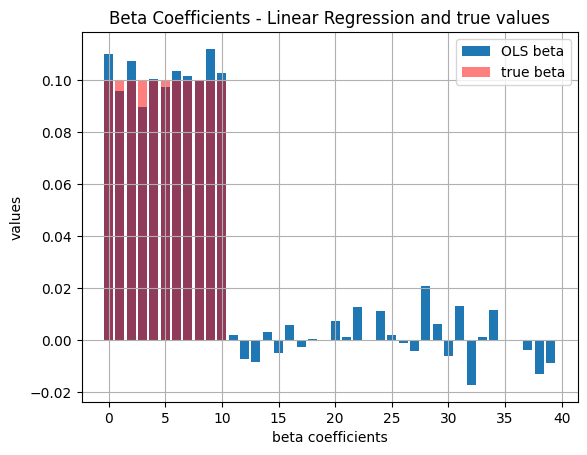

In [19]:
plt.bar(range(len(beta)),beta.ravel(), label = 'OLS beta')
plt.bar(range(len(coeff)),coeff, label = 'true beta',  color = 'red', alpha = 0.5)
plt.grid()
plt.xlabel("beta coefficients")
plt.ylabel("values")
plt.legend()
plt.title("Beta Coefficients - Linear Regression and true values")
plt.show()

We fitted a linear regression model and we can see that even if 

In [20]:
list_alpha = [0.005,0.01, 0.03, 0.5]
dic_coeff = {}
for alpha in list_alpha:
    model = Lasso(alpha= alpha, fit_intercept=False)
    model.fit(X,Y)
    dic_coeff[alpha] = model.coef_

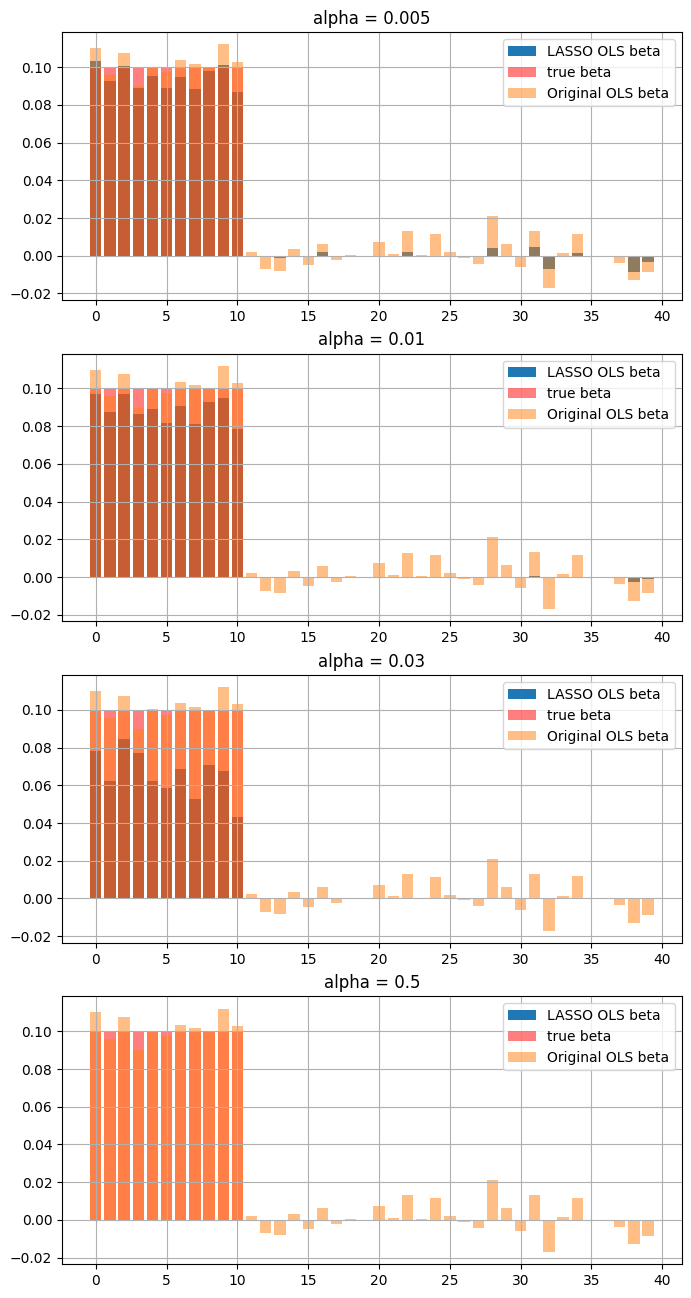

In [21]:
fig, axes = plt.subplots(nrows = len(list_alpha), ncols= 1,figsize = (8,4*len(list_alpha)))

for ax,alpha in zip(axes,dic_coeff.keys()):
    ax.bar(range(len(dic_coeff[alpha])),dic_coeff[alpha], label = 'LASSO OLS beta')
    ax.bar(range(len(coeff)),coeff, label = 'true beta',color = 'red', alpha = 0.5)
    ax.bar(range(len(beta)),beta.ravel(), label = "Original OLS beta", alpha = 0.5)
    ax.grid()
    ax.set_title(f"alpha = {alpha}")
    ax.legend()
plt.show()

We  can see that 

### Ridge Regression 

The **RIDGE** Regression is a regularization method where the function $J$ is the $L_2$ norm. In our case we apply it to the linear regression thus on the coefficients $ \left( \beta_i \right)_{1 \leq i \leq p}$ which gives : 
$$
PRSS \left( \beta, \lambda \right) = RSS \left( \beta \right) + \lambda || \beta ||_{2}^{2}
$$

### Bridge Regression 

### Elastic-Net

# Sources

[1] Hastie T., Tibshirani R., Friedman J., "Elements of Statistical Learning", 2009         
[2] Bishop C., "Pattern recognition and machine learning", 2006